Dhruv Gandhi and Aayush Dhiman

In [4]:
# https://forums.trakt.tv/t/id-like-an-honest-opinion-which-rating-system-you-trust/1779/2

In [5]:
# /search/trakt/:id?id_type=movie

In [6]:
import src.obtain_data
import src.collaborative_filtering
import time
import psutil

In [7]:
# src.obtain_data.main(15)

In [8]:
rating=4
trakt_id=24402
user_entry = src.obtain_data.create_user_entry(rating, trakt_id)

In [9]:
non_na_counts = user_entry.notna().sum(axis=1)
row_with_most_non_na = non_na_counts.idxmax()
row_with_most_non_na

item_cosine_unscaled_rmse, item_euclidean_unscaled_rmse, user_cosine_unscaled_rmse, user_euclidean_unscaled_rmse, item_cosine_scaled_rmse, item_euclidean_scaled_rmse, user_cosine_scaled_rmse, user_euclidean_scaled_rmse = (None,)*8
item_cosine_unscaled_mae, item_euclidean_unscaled_mae, user_cosine_unscaled_mae, user_euclidean_unscaled_mae, item_cosine_scaled_mae, item_euclidean_scaled_mae, user_cosine_scaled_mae, user_euclidean_scaled_mae = (None,)*8
item_cosine_unscaled_time, item_euclidean_unscaled_time, user_cosine_unscaled_time, user_euclidean_unscaled_time, item_cosine_scaled_time, item_euclidean_scaled_time, user_cosine_scaled_time, user_euclidean_scaled_time = (None,)*8
item_cosine_unscaled_memory, item_euclidean_unscaled_memory, user_cosine_unscaled_memory, user_euclidean_unscaled_memory, item_cosine_scaled_memory, item_euclidean_scaled_memory, user_cosine_scaled_memory, user_euclidean_scaled_memory = (None,)*8

In [10]:
def measure_memory():
    """Measure current memory usage in MB."""
    process = psutil.Process()
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024)

In [11]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_cosine_unscaled_rmse, item_cosine_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='item', scale=False)
    item_cosine_unscaled_time = time.time() - start_time
    item_cosine_unscaled_memory = measure_memory() - start_memory
except Exception as e:
    print(f"Error in item_cosine_unscaled: {e}")
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_euclidean_unscaled_rmse, item_euclidean_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='item', scale=False)
    item_euclidean_unscaled_time = time.time() - start_time
    item_euclidean_unscaled_memory = measure_memory() - start_memory
except:
    pass

print(f"Item-based Cosine Unscaled RMSE: {item_cosine_unscaled_rmse}")
print(f"Item-based Cosine Unscaled MAE: {item_cosine_unscaled_mae}")
print(f"Item-based Euclidean Unscaled RMSE: {item_euclidean_unscaled_rmse}")
print(f"Item-based Euclidean Unscaled MAE: {item_euclidean_unscaled_mae}")

Predicted ratings for PaleBluDot, method=item, k=5, distance=cosine, scale=False
RMSE: 0.9127577026527655, MAE: 0.5716011295390633
Predicted ratings for PaleBluDot, method=item, k=5, distance=euclidean, scale=False
RMSE: 0.8763260514649304, MAE: 0.5431871989496729
Item-based Cosine Unscaled RMSE: 0.9127577026527655
Item-based Cosine Unscaled MAE: 0.5716011295390633
Item-based Euclidean Unscaled RMSE: 0.8763260514649304
Item-based Euclidean Unscaled MAE: 0.5431871989496729


In [12]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_cosine_unscaled_rmse, user_cosine_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='user', scale=False)
    user_cosine_unscaled_time = time.time() - start_time
    user_cosine_unscaled_memory = measure_memory() - start_memory
except:
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_euclidean_unscaled_rmse, user_euclidean_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='user', scale=False)
    user_euclidean_unscaled_time = time.time() - start_time
    user_euclidean_unscaled_memory = measure_memory() - start_memory
except:
    pass


print(f"User-based Cosine Unscaled RMSE: {user_cosine_unscaled_rmse}")
print(f"User-based Cosine Unscaled MAE: {user_cosine_unscaled_mae}")
print(f"User-based Euclidean Unscaled RMSE: {user_euclidean_unscaled_rmse}")
print(f"User-based Euclidean Unscaled MAE: {user_euclidean_unscaled_mae}")

Predicted ratings for PaleBluDot, method=user, k=5, distance=cosine, scale=False
RMSE: 1.3620749564929515, MAE: 0.8757262673743725
Predicted ratings for PaleBluDot, method=user, k=5, distance=euclidean, scale=False
RMSE: 1.3652364673931972, MAE: 0.9028209855649639
User-based Cosine Unscaled RMSE: 1.3620749564929515
User-based Cosine Unscaled MAE: 0.8757262673743725
User-based Euclidean Unscaled RMSE: 1.3652364673931972
User-based Euclidean Unscaled MAE: 0.9028209855649639


In [13]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_cosine_scaled_rmse, item_cosine_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='item', scale=True)
    item_cosine_scaled_time = time.time() - start_time
    item_cosine_scaled_memory = measure_memory() - start_memory
except:
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_euclidean_scaled_rmse, item_euclidean_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='item', scale=True)
    item_euclidean_scaled_time = time.time() - start_time
    item_euclidean_scaled_memory = measure_memory() - start_memory
except:
    pass

print(f"Item-based Cosine Scaled RMSE: {item_cosine_scaled_rmse}")
print(f"Item-based Cosine Scaled MAE: {item_cosine_scaled_mae}")
print(f"Item-based Euclidean Scaled RMSE: {item_euclidean_scaled_rmse}")
print(f"Item-based Euclidean Scaled MAE: {item_euclidean_scaled_mae}")

Predicted ratings for PaleBluDot, method=item, k=5, distance=cosine, scale=True
RMSE: 0.9143613581909171, MAE: 0.5707509216736755
Predicted ratings for PaleBluDot, method=item, k=5, distance=euclidean, scale=True
RMSE: 1.1249418578538362, MAE: 0.7633843601490756
Item-based Cosine Scaled RMSE: 0.9143613581909171
Item-based Cosine Scaled MAE: 0.5707509216736755
Item-based Euclidean Scaled RMSE: 1.1249418578538362
Item-based Euclidean Scaled MAE: 0.7633843601490756


In [14]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_cosine_scaled_rmse, user_cosine_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='user', scale=True)
    user_cosine_scaled_time = time.time() - start_time
    user_cosine_scaled_memory = measure_memory() - start_memory
except:
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_euclidean_scaled_rmse, user_euclidean_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='user', scale=True)
    user_euclidean_scaled_time = time.time() - start_time
    user_euclidean_scaled_memory = measure_memory() - start_memory
except:
    pass

print(f"User-based Cosine Scaled RMSE: {user_cosine_scaled_rmse}")
print(f"User-based Cosine Scaled MAE: {user_cosine_scaled_mae}")
print(f"User-based Euclidean Scaled RMSE: {user_euclidean_scaled_rmse}")
print(f"User-based Euclidean Scaled MAE: {user_euclidean_scaled_mae}")

Predicted ratings for PaleBluDot, method=user, k=5, distance=cosine, scale=True
RMSE: 1.3131497064067597, MAE: 0.8713842641571462
Predicted ratings for PaleBluDot, method=user, k=5, distance=euclidean, scale=True
RMSE: 1.300417783797507, MAE: 0.8595678448800477
User-based Cosine Scaled RMSE: 1.3131497064067597
User-based Cosine Scaled MAE: 0.8713842641571462
User-based Euclidean Scaled RMSE: 1.300417783797507
User-based Euclidean Scaled MAE: 0.8595678448800477


In [15]:
import pandas as pd
df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'Time (s)', 'Memory (MB)'])
item_cosine_unscaled_data = pd.DataFrame([{'Model': 'Item-based Cosine Unscaled', 'RMSE': item_cosine_unscaled_rmse, 'MAE': item_cosine_unscaled_mae, 'Time (s)': item_cosine_unscaled_time, 'Memory (MB)': item_cosine_unscaled_memory}])
item_euclidean_unscaled_data = pd.DataFrame([{'Model': 'Item-based Euclidean Unscaled', 'RMSE': item_euclidean_unscaled_rmse, 'MAE': item_euclidean_unscaled_mae, 'Time (s)': item_euclidean_unscaled_time, 'Memory (MB)': item_euclidean_unscaled_memory}])
user_cosine_unscaled_data = pd.DataFrame([{'Model': 'User-based Cosine Unscaled', 'RMSE': user_cosine_unscaled_rmse, 'MAE': user_cosine_unscaled_mae, 'Time (s)': user_cosine_unscaled_time, 'Memory (MB)': user_cosine_unscaled_memory}])
user_euclidean_unscaled_data = pd.DataFrame([{'Model': 'User-based Euclidean Unscaled', 'RMSE': user_euclidean_unscaled_rmse, 'MAE': user_euclidean_unscaled_mae, 'Time (s)': user_euclidean_unscaled_time, 'Memory (MB)': user_euclidean_unscaled_memory}])
item_cosine_scaled_data = pd.DataFrame([{'Model': 'Item-based Cosine Scaled', 'RMSE': item_cosine_scaled_rmse, 'MAE': item_cosine_scaled_mae, 'Time (s)': item_cosine_scaled_time, 'Memory (MB)': item_cosine_scaled_memory}])
item_euclidean_scaled_data = pd.DataFrame([{'Model': 'Item-based Euclidean Scaled', 'RMSE': item_euclidean_scaled_rmse, 'MAE': item_euclidean_scaled_mae, 'Time (s)': item_euclidean_scaled_time, 'Memory (MB)': item_euclidean_scaled_memory}])
user_cosine_scaled_data = pd.DataFrame([{'Model': 'User-based Cosine Scaled', 'RMSE': user_cosine_scaled_rmse, 'MAE': user_cosine_scaled_mae, 'Time (s)': user_cosine_scaled_time, 'Memory (MB)': user_cosine_scaled_memory}])
user_euclidean_scaled_data = pd.DataFrame([{'Model': 'User-based Euclidean Scaled', 'RMSE': user_euclidean_scaled_rmse, 'MAE': user_euclidean_scaled_mae, 'Time (s)': user_euclidean_scaled_time, 'Memory (MB)': user_euclidean_scaled_memory}])
df = pd.concat([df, item_cosine_unscaled_data], ignore_index=True)
df = pd.concat([df, item_euclidean_unscaled_data], ignore_index=True)
df = pd.concat([df, user_cosine_unscaled_data], ignore_index=True)
df = pd.concat([df, user_euclidean_unscaled_data], ignore_index=True)
df = pd.concat([df, item_cosine_scaled_data], ignore_index=True)
df = pd.concat([df, item_euclidean_scaled_data], ignore_index=True)
df = pd.concat([df, user_cosine_scaled_data], ignore_index=True)
df = pd.concat([df, user_euclidean_scaled_data], ignore_index=True)
df.to_csv('model_evaluation_results.csv', index=False)

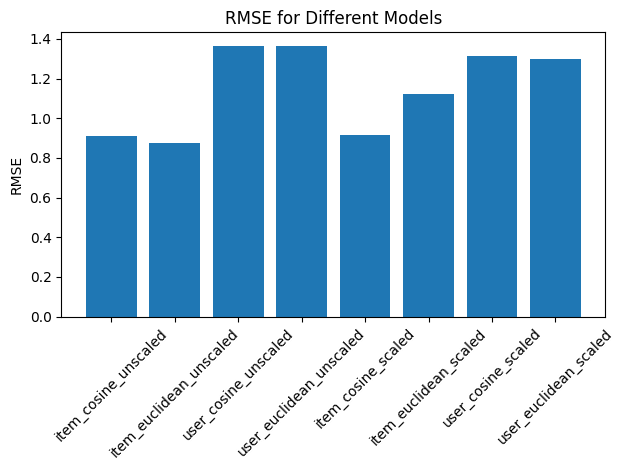

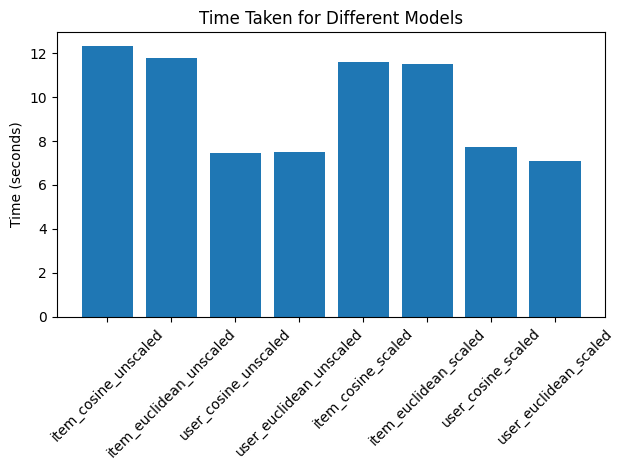

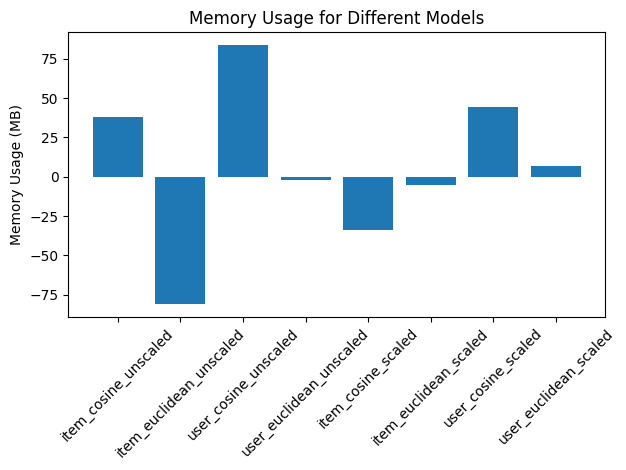

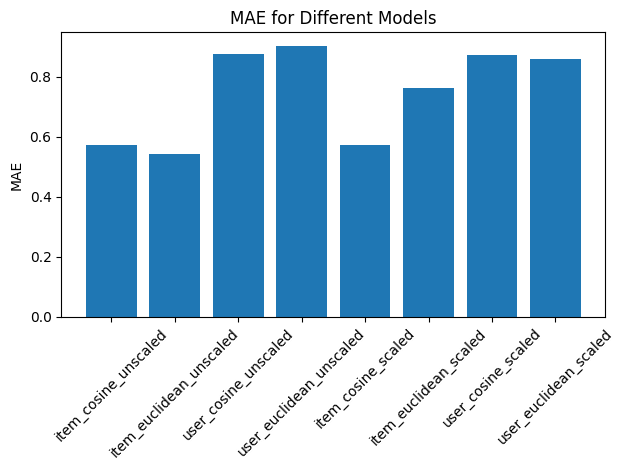

In [ ]:
import matplotlib.pyplot as plt

labels = [
    'item_cosine_unscaled',
    'item_euclidean_unscaled',
    'user_cosine_unscaled',
    'user_euclidean_unscaled',
    'item_cosine_scaled',
    'item_euclidean_scaled',
    'user_cosine_scaled',
    'user_euclidean_scaled'
]

rmses = [
    item_cosine_unscaled_rmse,
    item_euclidean_unscaled_rmse,
    user_cosine_unscaled_rmse,
    user_euclidean_unscaled_rmse,
    item_cosine_scaled_rmse,
    item_euclidean_scaled_rmse,
    user_cosine_scaled_rmse,
    user_euclidean_scaled_rmse
]

maes = [
    item_cosine_unscaled_mae,
    item_euclidean_unscaled_mae,
    user_cosine_unscaled_mae,
    user_euclidean_unscaled_mae,
    item_cosine_scaled_mae,
    item_euclidean_scaled_mae,
    user_cosine_scaled_mae,
    user_euclidean_scaled_mae
]

times = [
    item_cosine_unscaled_time,
    item_euclidean_unscaled_time,
    user_cosine_unscaled_time,
    user_euclidean_unscaled_time,
    item_cosine_scaled_time,
    item_euclidean_scaled_time,
    user_cosine_scaled_time,
    user_euclidean_scaled_time
]

memories = [
    item_cosine_unscaled_memory,
    item_euclidean_unscaled_memory,
    user_cosine_unscaled_memory,
    user_euclidean_unscaled_memory,
    1-item_cosine_scaled_memory,
    item_euclidean_scaled_memory,
    user_cosine_scaled_memory,
    user_euclidean_scaled_memory
]


plt.figure()
plt.bar(labels, rmses)
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(labels, times)
plt.ylabel('Time (seconds)')
plt.title('Time Taken for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(labels, memories)
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(labels, maes)
plt.ylabel('MAE')
plt.title('MAE for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
!streamlit run src/deploy_streamlit.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.16.30.1:8501

2025-04-14 23:31:44.377 Uncaught app exception
Traceback (most recent call last):
  File "/Users/dhruvgandhi/anaconda3/envs/class_files/lib/python3.8/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/Users/dhruvgandhi/anaconda3/envs/class_files/lib/python3.8/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/Users/dhruvgandhi/Documents/DS 4420/FinalProject/src/deploy_streamlit.py", line 2, in <module>
    from collaborative_filtering import *
  File "/Users/dhruvgandhi/Documents/DS 4420/FinalProject/src/collaborative_filtering.py", line 5, in <module>
    from src.obtain_data import *
ModuleNotFoundError: No module named 'src'
2025-04-14 23:32:50.689 Please replace `st.experimental_get_query_params

In [ ]:
preds_cosine_item = src.collaborative_filtering.collab_filter_user(user_entry, row_with_most_non_na, k=5, distance='cosine', scale=False)
preds_euclidean_item = src.collaborative_filtering.collab_filter_user(user_entry, row_with_most_non_na, k=5, distance='euclidean', scale=False)
preds_cosine_user = src.collaborative_filtering.collab_filter_user(user_entry, row_with_most_non_na, k=5, distance='cosine', scale=False)
preds_euclidean_user = src.collaborative_filtering.collab_filter_user(user_entry, row_with_most_non_na, k=5, distance='euclidean', scale=False)

In [ ]:
recommended_cosine_item = src.collaborative_filtering.recommend_movies(preds_cosine_item, 10, 0)
recommended_euclidean_item = src.collaborative_filtering.recommend_movies(preds_euclidean_item, 10, 0)
recommended_cosine_user = src.collaborative_filtering.recommend_movies(preds_cosine_user, 10, 0)
recommended_euclidean_user = src.collaborative_filtering.recommend_movies(preds_euclidean_user, 10, 0)

In [ ]:
recommended_cosine_item

,ids.trakt,predicted_rating,title,year,certification,poster_url,watchers
0,307,10.000000,Das Boot,1981.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
1,461,10.000000,The Lives of Others,2006.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,1.0
2,1053466,10.252084,The Curse of the Necklace,2024.0,R,https://walter-r2.trakt.tv/images/movies/001/0...,0.0
3,324,10.000000,La Haine,1995.0,NR,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
4,49,10.000000,Hero,2002.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
5,384,10.000000,The Seventh Seal,1957.0,NR,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
6,919,10.000000,Gleaming the Cube,1989.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
7,5241,14.559603,Ghosts of Mars,2001.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
8,702,10.000000,Dangerous Liaisons,1988.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
9,502,10.000000,Un Chien Andalou,1929.0,None,https://walter-r2.trakt.tv/images/movies/000/0...,0.0


In [ ]:
recommended_euclidean_item

,ids.trakt,predicted_rating,title,year,certification,poster_url,watchers
0,1122,10.0,The Reaping,2007.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
1,1303,10.0,Stomp the Yard,2007.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
2,687,10.0,2046,2004.0,None,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
3,1227,10.0,The Long Goodbye,1973.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
4,932,10.0,Stalker,1979.0,NR,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
5,1287,10.0,The Sea Inside,2004.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
6,1409,10.0,Open Range,2003.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
7,285,10.0,"Good Bye, Lenin!",2003.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
8,1374,10.0,The Diving Bell and the Butterfly,2007.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
9,1305,10.0,Shakespeare in Love,1998.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0


In [ ]:
recommended_cosine_user

,ids.trakt,predicted_rating,title,year,certification,poster_url,watchers
0,307,10.000000,Das Boot,1981.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
1,461,10.000000,The Lives of Others,2006.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,1.0
2,1053466,10.252084,The Curse of the Necklace,2024.0,R,https://walter-r2.trakt.tv/images/movies/001/0...,0.0
3,324,10.000000,La Haine,1995.0,NR,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
4,49,10.000000,Hero,2002.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
5,384,10.000000,The Seventh Seal,1957.0,NR,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
6,919,10.000000,Gleaming the Cube,1989.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
7,5241,14.559603,Ghosts of Mars,2001.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
8,702,10.000000,Dangerous Liaisons,1988.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
9,502,10.000000,Un Chien Andalou,1929.0,None,https://walter-r2.trakt.tv/images/movies/000/0...,0.0


In [ ]:
recommended_euclidean_user

,ids.trakt,predicted_rating,title,year,certification,poster_url,watchers
0,1122,10.0,The Reaping,2007.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
1,1303,10.0,Stomp the Yard,2007.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
2,687,10.0,2046,2004.0,None,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
3,1227,10.0,The Long Goodbye,1973.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
4,932,10.0,Stalker,1979.0,NR,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
5,1287,10.0,The Sea Inside,2004.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
6,1409,10.0,Open Range,2003.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
7,285,10.0,"Good Bye, Lenin!",2003.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
8,1374,10.0,The Diving Bell and the Butterfly,2007.0,PG-13,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
9,1305,10.0,Shakespeare in Love,1998.0,R,https://walter-r2.trakt.tv/images/movies/000/0...,0.0
